### Planning

### DYNA-Q

✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
🔀 Exploration : action aléatoire → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q → 1
✅ Exploitation : meilleure action selon Q → 0
✅ Exploitation : meilleure action selon Q →

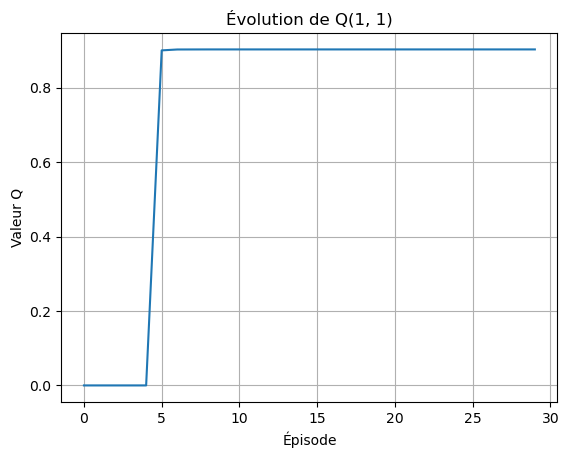

In [26]:
import numpy as np

from algos.planning import dyna_q
from envs.line_world import reinitialiser, faire_un_pas
from algos.politique import politique_epsilon_greedy 
from algos.temporal_difference_learning import sarsa_q_learning, tracer_q

Q, df_q = dyna_q(
    reinitialiser=reinitialiser,
    faire_un_pas=faire_un_pas,
    obtenir_actions=lambda e: actions,
    episodes=30,
    alpha=0.5,
    gamma=0.95,
    epsilon=0.1,
    planning_steps=20,         # Nombre d'itérations de planification
    etats_suivis=etats,
    verbose=True
)

def afficher_politique(Q, etats, actions):
    print("\n Politique optimale apprise (greedy) :\n")
    for e in etats:
        valeurs_q = [Q[(e, a)] for a in actions]
        a_opt = actions[np.argmax(valeurs_q)]
        print(f"État {e} : action optimale = {a_opt} → (Q = {Q[(e, a_opt)]:.2f})")

afficher_politique(Q, etats, actions)

tracer_q(df_q, 1, 1)

### Temporal difference learning

### Q-learning

In [15]:
import sys
sys.path.append("..")
from algos.temporal_difference_learning import sarsa_q_learning,afficher_politique, tracer_q,tester_politique_figee


In [16]:
## Q-learning


import numpy as np


from envs.line_world import reinitialiser, faire_un_pas,etats_terminaux, etats, actions
from algos.politique import politique_epsilon_greedy 


# Entraînement avec suivi des Q-valeurs sur tous les états
Q, df_q, historique_loss = sarsa_q_learning(
    reinitialiser=reinitialiser,
    faire_un_pas=faire_un_pas,
    obtenir_actions=lambda e: actions,
    episodes=30,
    alpha=0.1,
    gamma=0.99,
    epsilon=0.1,
    etats_suivis=etats,
    mode="q_learning",  # ou "q_learning"
    verbose=True
)




Entraînement:   3%|▎         | 1/30 [00:00<00:03,  8.17it/s]

🎯 Épisode 1
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 1
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(3,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 1 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.1000
📉 TD Error  : 1.0000
📉 Loss      : 0.5000
------------------------------
🎯 Épisode 2 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.1900
📉 TD Error  : 0.9000
📉 Loss      : 0.4050
------------------------------


Entraînement:  20%|██        | 6/30 [00:00<00:01, 18.24it/s]

🎯 Épisode 3 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.2710
📉 TD Error  : 0.8100
📉 Loss      : 0.3281
------------------------------
🎯 Épisode 4 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.3439
📉 TD Error  : 0.7290
📉 Loss      : 0.2657
------------------------------
🎯 Épisode 5 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.4095
📉 TD Error  : 0.6561
📉 Loss      : 0.2152
------------------------------
🎯 Épisode 6 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.4686
📉 TD Error  : 0.5905
📉 Loss      : 0.1743
------------------------------
🎯 Épisode 7 (Terminal)


🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.5217
📉 TD Error  : 0.5314
📉 Loss      : 0.1412
------------------------------
🎯 Épisode 8 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.5695
📉 TD Error  : 0.4783
📉 Loss      : 0.1144
------------------------------
🎯 Épisode 9 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.6126
📉 TD Error  : 0.4305
📉 Loss      : 0.0927
------------------------------
🎯 Épisode 10 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.6513
📉 TD Error  : 0.3874
📉 Loss      : 0.0750
------------------------------
🎯 Épisode 11 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0


Entraînement:  50%|█████     | 15/30 [00:00<00:00, 22.55it/s]

📊 Q(3,1) = 0.6862
📉 TD Error  : 0.3487
📉 Loss      : 0.0608
------------------------------
🎯 Épisode 12 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.7176
📉 TD Error  : 0.3138
📉 Loss      : 0.0492
------------------------------
🎯 Épisode 13 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.7458
📉 TD Error  : 0.2824
📉 Loss      : 0.0399
------------------------------
🎯 Épisode 14 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.7712
📉 TD Error  : 0.2542
📉 Loss      : 0.0323
------------------------------
🎯 Épisode 15 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.7941
📉 TD Error  : 0.2288
📉 Loss      : 0.0262
------------------------------
🎯 Épisode 16 (Terminal)


🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.8147
📉 TD Error  : 0.2059
📉 Loss      : 0.0212
------------------------------
🎯 Épisode 17 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.8332
📉 TD Error  : 0.1853
📉 Loss      : 0.0172
------------------------------
🎯 Épisode 18 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.8499
📉 TD Error  : 0.1668
📉 Loss      : 0.0139
------------------------------
🎯 Épisode 19 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.8649
📉 TD Error  : 0.1501
📉 Loss      : 0.0113
------------------------------
🎯 Épisode 20 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.8784
📉 TD Error  : 0.1351
📉 Loss      : 0.0091
------------------------------
🎯 Épisode 21 (Terminal)


Entraînement:  80%|████████  | 24/30 [00:01<00:00, 22.64it/s]

🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.8906
📉 TD Error  : 0.1216
📉 Loss      : 0.0074
------------------------------
🎯 Épisode 22 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9015
📉 TD Error  : 0.1094
📉 Loss      : 0.0060
------------------------------
🎯 Épisode 23
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 23
🧠 État     : 1
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(1,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 23 (Terminal)
🧠 État     : 1
🎮 Action   : 0
💰 Récompense : -1.0
📊 Q(1,0) = -0.1000
📉 TD Error  : -1.0000
📉 Loss      : 0.5000
------------------------------
🎯 Épisode 24 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9114
📉 TD Error  : 0.0985
📉 Loss      : 0.0048
------------------------------


Entraînement:  93%|█████████▎| 28/30 [00:01<00:00, 25.49it/s]

🎯 Épisode 25 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9202
📉 TD Error  : 0.0886
📉 Loss      : 0.0039
------------------------------
🎯 Épisode 26 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9282
📉 TD Error  : 0.0798
📉 Loss      : 0.0032
------------------------------
🎯 Épisode 27 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9354
📉 TD Error  : 0.0718
📉 Loss      : 0.0026
------------------------------
🎯 Épisode 28 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9419
📉 TD Error  : 0.0646
📉 Loss      : 0.0021
------------------------------
🎯 Épisode 29 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9477
📉 TD Error  : 0.0581
📉 Loss      : 0.0017
------------------------------
🎯 Épisode 30 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.9529
📉 TD Error  : 0.0523


Entraînement: 100%|██████████| 30/30 [00:01<00:00, 22.86it/s]

📉 Loss      : 0.0014
------------------------------


In [17]:
afficher_politique(Q, etats, actions, etats_terminaux)



🧠 Politique apprise (greedy) :
État 0 (terminal) : ⛔
État 1 : action optimale = 1 → (Q = 0.00)
État 2 : action optimale = 0 ← (Q = 0.00)
État 3 : action optimale = 1 → (Q = 0.95)
État 4 (terminal) : ⛔


In [18]:
# === Affichage complet de la Q-table ===
print("\n Q-table apprise :\n")
for (etat, action), valeur in sorted(Q.items()):
    symbole = "←" if action == 0 else "→"
    print(f"Q({etat}, {action}) {symbole} = {valeur:.2f}")


 Q-table apprise :

Q(0, 0) ← = 0.00
Q(0, 1) → = 0.00
Q(1, 0) ← = -0.10
Q(1, 1) → = 0.00
Q(2, 0) ← = 0.00
Q(2, 1) → = 0.00
Q(3, 0) ← = 0.00
Q(3, 1) → = 0.95
Q(4, 0) ← = 0.00
Q(4, 1) → = 0.00


### SARSA

In [1]:
import sys
sys.path.append("..")
from algos.temporal_difference_learning import sarsa_q_learning,afficher_politique, tracer_q,tester_politique_figee


In [12]:
## SARSA AVEC BARRE DE PROGRESSION 


import numpy as np


from envs.line_world import reinitialiser, faire_un_pas,etats_terminaux, etats, actions
from algos.politique import politique_epsilon_greedy 


# Entraînement avec suivi des Q-valeurs sur tous les états
Q, df_q, historique_loss = sarsa_q_learning(
    reinitialiser=reinitialiser,
    faire_un_pas=faire_un_pas,
    obtenir_actions=lambda e: actions,
    episodes=10,
    alpha=0.1,
    gamma=0.99,
    epsilon=0.1,
    etats_suivis=etats,
    mode="sarsa",  # ou "q_learning"
    verbose=True
)




🎯 Épisode 1
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 1
🧠 État     : 1
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(1,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 1 (Terminal)
🧠 État     : 1
🎮 Action   : 0
💰 Récompense : -1.0
📊 Q(1,0) = -0.1000
📉 TD Error  : -1.0000
📉 Loss      : 0.5000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.

📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action 

Entraînement:   0%|          | 0/10 [00:00<?, ?it/s]

💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
---------

Entraînement:   0%|          | 0/10 [00:00<?, ?it/s]

📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action 

📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
----------------------------

Entraînement:   0%|          | 0/10 [00:01<?, ?it/s]

🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0

Entraînement:  20%|██        | 2/10 [00:01<00:05,  1.59it/s]

💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(1,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 2
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(2,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 2
🧠 État     : 1
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(1,0) = -0.1000
📉 TD Error  : -0.0990
📉 Loss      : 0.0049
------------------------------
🎯 Épisode 2 (Terminal)
🧠 État     : 1
🎮 Action   : 0
💰 Récompense : -1.0
📊 Q(1,0) = -0.1900
📉 TD Error  : -0.9000
📉 Loss      : 0.4050
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 

Entraînement:  20%|██        | 2/10 [00:01<00:05,  1.59it/s]

------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 

Entraînement:  20%|██        | 2/10 [00:01<00:05,  1.59it/s]

📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 É

📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000


📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 0
💰 Récompense : 0.0
📊 Q(3,0) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(3,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 3 (Te

Entraînement:  60%|██████    | 6/10 [00:02<00:01,  3.56it/s]

🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.1000
📉 TD Error  : 1.0000
📉 Loss      : 0.5000
------------------------------
🎯 Épisode 4 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.1900
📉 TD Error  : 0.9000
📉 Loss      : 0.4050
------------------------------
🎯 Épisode 5 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.2710
📉 TD Error  : 0.8100
📉 Loss      : 0.3281
------------------------------
🎯 Épisode 6
🧠 État     : 2
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(2,1) = 0.0000
📉 TD Error  : 0.0000
📉 Loss      : 0.0000
------------------------------
🎯 Épisode 6
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 0.0
📊 Q(3,1) = 0.2710
📉 TD Error  : 0.2683
📉 Loss      : 0.0360
------------------------------
🎯 Épisode 6 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.3439
📉 TD Error  : 0.7290
📉 Loss      : 0.2657
------------------------------
🎯 Épisode 7 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) =

Entraînement: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

📉 Loss      : 0.1743
------------------------------
🎯 Épisode 9 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.5217
📉 TD Error  : 0.5314
📉 Loss      : 0.1412
------------------------------
🎯 Épisode 10 (Terminal)
🧠 État     : 3
🎮 Action   : 1
💰 Récompense : 1.0
📊 Q(3,1) = 0.5695
📉 TD Error  : 0.4783
📉 Loss      : 0.1144
------------------------------


In [13]:
afficher_politique(Q, etats, actions, etats_terminaux)



🧠 Politique apprise (greedy) :
État 0 (terminal) : ⛔
État 1 : action optimale = 1 → (Q = 0.00)
État 2 : action optimale = 1 → (Q = 0.03)
État 3 : action optimale = 1 → (Q = 0.57)
État 4 (terminal) : ⛔


In [14]:
# === Affichage complet de la Q-table ===
print("\n Q-table apprise :\n")
for (etat, action), valeur in sorted(Q.items()):
    symbole = "←" if action == 0 else "→"
    print(f"Q({etat}, {action}) {symbole} = {valeur:.2f}")


 Q-table apprise :

Q(0, 0) ← = 0.00
Q(0, 1) → = 0.00
Q(1, 0) ← = -0.19
Q(1, 1) → = 0.00
Q(2, 0) ← = -0.01
Q(2, 1) → = 0.03
Q(3, 0) ← = 0.00
Q(3, 1) → = 0.57
Q(4, 0) ← = 0.00
Q(4, 1) → = 0.00


### Dynamique programing